In [2]:
# 모델 가져오는데 필요한 패키지 import
from tensorflow.keras.models import load_model
import tensorflow as tf

In [3]:
# 저장시킨 모델 'model.h5' 로드하기
model = load_model('model.h5')

In [4]:
# 쌓은 층 맞는지 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 60)      1680      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 60)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 50)        27050     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 50)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 50)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 50)        2

In [5]:
# 모델 돌리는데 필요한 패키지 import
import numpy as np
import os
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation
from numpy import argmax
import matplotlib.pyplot as plt             
import cv2                                 
from tqdm import tqdm

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [6]:
# 테스트 이미지 가져오기
base_dir = './test_image'
test_dir = os.path.join(base_dir)

print(test_dir)
test_image = os.listdir(test_dir)
test_image

./test_image


['joly.png']

In [91]:
# 클래스 및 이미지 사이즈 지정하는 부분
class_names = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [92]:
# 이미지 reshape -> 모델에 적용시킨 거랑 똑같이
for img in test_image:
    print(img)
    image = cv2.imread(img)
    print(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE) 
    image = np.array(image, dtype = 'float32')
    image = image / 255.0

    print(image)

joly.png
[[[183 162 165]
  [183 162 165]
  [183 162 165]
  ...
  [178 160 167]
  [178 160 167]
  [178 160 167]]

 [[184 163 166]
  [184 163 166]
  [184 163 166]
  ...
  [179 161 168]
  [179 161 168]
  [178 160 167]]

 [[186 165 168]
  [186 165 168]
  [186 165 168]
  ...
  [179 161 168]
  [179 161 168]
  [178 160 167]]

 ...

 [[ 44  61  85]
  [ 46  63  86]
  [ 31  48  70]
  ...
  [ 55  89 128]
  [ 69 104 142]
  [ 74 109 148]]

 [[ 39  59  84]
  [ 34  53  77]
  [ 31  49  72]
  ...
  [ 46  80 119]
  [ 62  96 135]
  [ 68 104 142]]

 [[ 37  58  84]
  [ 33  53  78]
  [ 31  50  74]
  ...
  [ 33  66 105]
  [ 47  81 120]
  [ 56  92 130]]]
[[[0.64705884 0.6392157  0.72156864]
  [0.6509804  0.6392157  0.72156864]
  [0.64705884 0.63529414 0.7176471 ]
  ...
  [0.6509804  0.62352943 0.69411767]
  [0.654902   0.627451   0.69803923]
  [0.654902   0.627451   0.69803923]]

 [[0.6627451  0.6509804  0.73333335]
  [0.65882355 0.64705884 0.7294118 ]
  [0.654902   0.6431373  0.7254902 ]
  ...
  [0.654902   

In [93]:
# shape 확인
image.shape

(150, 150, 3)

In [94]:
# 에러나서 패키지 새로 깔았음
# !pip install gast==0.3.3

In [95]:
# shape 다시 정의
image = image.reshape((-1,150,150,3))

In [96]:
model.predict(image)

1/1 [==============================] - 0s 24ms/step


array([[9.60989865e-08, 9.20538241e-07, 4.06542644e-02, 1.54818036e-03,
        9.57796514e-01, 7.24204815e-18, 2.07605539e-16, 3.21491752e-16,
        2.16029652e-16, 1.30972205e-15, 4.93085937e-16, 2.93025175e-18,
        1.01562799e-17, 1.88028768e-16, 1.62863683e-14, 8.13108926e-19,
        2.55681676e-17, 1.12313262e-13, 8.37887572e-17, 3.30176731e-18,
        9.89378840e-20, 3.03895156e-15, 5.00604247e-17, 1.73806089e-15,
        1.79271305e-15, 5.74200789e-13, 2.18591132e-16, 8.74311213e-18,
        1.07547085e-16, 1.29095720e-15, 6.52435810e-16, 7.21423057e-17,
        5.14509200e-16, 6.13807256e-17, 4.26764282e-17, 4.80634150e-15,
        5.40995022e-18, 3.16436737e-13, 1.61297010e-17, 5.92811065e-13,
        2.28493305e-16, 3.45324844e-17, 3.50189238e-14, 5.98201931e-16,
        5.39060933e-17, 1.10167173e-17, 1.54581778e-13, 1.01695388e-17,
        6.98691273e-17, 4.92265977e-18, 9.88848299e-17, 6.81880199e-21,
        7.59515791e-19, 1.08940555e-18, 6.52554638e-18, 1.155621

In [97]:
predictions = model.predict(image)
pred_labels = np.argmax(predictions, axis = 1) 

1/1 [==============================] - 0s 23ms/step


In [98]:
def display_random_image(class_names, images, labels):
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

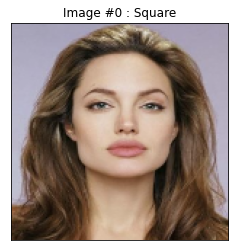

In [99]:
display_random_image(class_names, image, pred_labels)

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17832542693219953878
 xla_global_id: -1]

In [3]:
python --version

NameError: name 'python' is not defined